In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import timeit

import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE ## tf.data transformation parameters

matplotlib.style.use('ggplot')

In [139]:
import PIL
import PIL.Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import pathlib

# Create Dir path for each class

In [3]:
data_dir = pathlib.Path('images/')

In [6]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

7840


In [10]:
others = list(data_dir.glob('others/*'))
pedestrianCrossing = list(data_dir.glob('pedestrianCrossing/*'))
speedLimit = list(data_dir.glob('speedLimit/*'))
stop_sign = list(data_dir.glob('stop_sign/*'))
dct = {'others' :len(others),'pedestrianCrossing' :len(pedestrianCrossing),'speedLimit': len(speedLimit),'stop_sign': len(stop_sign)}
for k,v in dct.items():
    print(k,'  ',v)

others    3396
pedestrianCrossing    947
speedLimit    1602
stop_sign    1896


In [15]:
PIL.Image.open(str(stop_sign[5]))

# Create Data for training 

In [16]:
batch_size = 32
img_height = 180
img_width = 180


In [195]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  shuffle=True,
  seed=123,
  color_mode ='grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7840 files belonging to 4 classes.
Using 5488 files for training.


In [181]:
tf.keras.preprocessing.image_dataset_from_directory?

Signature:
tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
)
Docstring:
Generates a `tf.data.Dataset` from image files in a directory.

If your directory structure is:

```
main_directory/
...class_a/
......a_image_1.jpg
......a_image_2.jpg
...class_b/
......b_image_1.jpg
......b_image_2.jpg
```

Then calling `image_dataset_from_directory(main_directory, labels='inferred')`
will return a `tf.data.Dataset` that yields batches of images from
the subdirectories `class_a` and `class_b`, together with labels
0 and 1 (0 corresponding to `class_a` and 1 corresponding to `class_b`).

Supported image formats: jpeg, png, bmp, gif.
Animated gifs are truncated to the first frame.

Arguments:
  directory: Directory wh

In [ ]:
X_train,y_train = train_ds(dfsdfdsaf)

In [182]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7840 files belonging to 4 classes.
Using 2352 files for validation.


In [183]:
class_names = train_ds.class_names

class_name_dict = {'others': 0,'pedestrianCrossing':1,'speedLimit':2,'stop_sign':3}
class_names

['others', 'pedestrianCrossing', 'speedLimit', 'stop_sign']

In [184]:
train = ImageDataGenerator()

In [185]:
plt.imshow?

Signature:
plt.imshow(
    X,
    cmap=None,
    norm=None,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    shape=<deprecated parameter>,
    filternorm=1,
    filterrad=4.0,
    imlim=<deprecated parameter>,
    resample=None,
    url=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Display data as an image; i.e. on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. Note: For actually displaying
a grayscale image set up the color mapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

Parameters
----------
X : array-like or PIL image
    The image data. Supported array shapes are:

    - (M, N): an image with scalar data. The values are mapped to
      colors using normalization and a colormap. See parameters *norm*,
      *cmap*, *vmin*, *vmax*.
    - (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
 

In [186]:
train_ds.take(1)

<TakeDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

# Visualize data

In [206]:
x = np.array([[12],[13],[14]])
x.shape

(3, 1)

In [208]:
x.reshape(3).shape

(3,)

In [226]:
.zip:
    print(i)

TypeError: zip() missing 1 required positional argument: 'datasets'

In [222]:
y_train

or: shape=(32,), dtype=int32, numpy=
 array([2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 3, 2, 0, 1, 3, 2,
        2, 0, 0, 3, 3, 0, 3, 2, 0, 0], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 0, 0, 3, 0, 3, 2, 2, 0, 0, 2, 3, 3, 3, 3, 0, 2, 1, 3, 1, 0, 1,
        1, 3, 2, 3, 0, 0, 0, 1, 0, 0], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([1, 1, 0, 0, 3, 3, 3, 0, 0, 0, 0, 2, 0, 3, 1, 2, 2, 3, 0, 3, 0, 0,
        3, 3, 1, 0, 0, 3, 1, 1, 3, 2], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 0, 0, 3, 2, 2, 3, 2, 3, 0, 3, 0, 0, 0, 3, 0, 1, 2, 2, 3, 2, 1,
        1, 3, 1, 3, 1, 0, 2, 1, 0, 0], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 3, 0, 0, 3, 1, 0, 3,
        0, 0, 3, 1, 0, 3, 3, 0, 0, 1], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 0, 0, 0, 0, 0, 3, 2, 3, 3, 2, 3, 0, 0, 1, 0, 2, 3, 2, 3, 0, 0,
        0, 0, 3, 0,

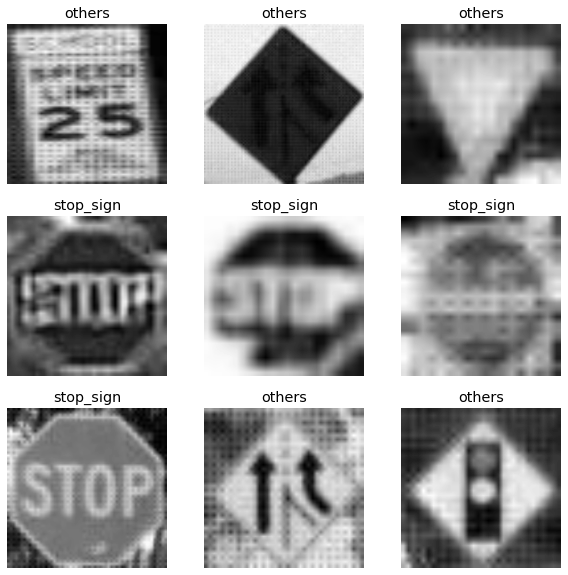

In [216]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8').reshape(180,180),cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [67]:
np_class_names = np.array(class_names)
for imgs,labels in train_ds.take(1):
    print(np_class_names[labels])
    

['others' 'others' 'others' 'others' 'others' 'others' 'others' 'others'
 'others' 'others' 'others' 'others' 'others' 'others'
 'pedestrianCrossing' 'stop_sign' 'others' 'others' 'stop_sign'
 'stop_sign' 'stop_sign' 'stop_sign' 'others' 'others' 'stop_sign'
 'stop_sign' 'others' 'others' 'stop_sign' 'others' 'others' 'others']


In [215]:
train_ds.take(2)

AttributeError: 'TakeDataset' object has no attribute 'shape'

In [ ]:
7840

In [214]:
5488/32

171.5

# Build train data pipeline

In [69]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset